# Simulation Charge Calibration

This notebook demonstrates the charge calibration that is automatically underlying the charge simulated with sstcam-simulation, due to the normalisation of the input SPE spectrum. Consequently, the Gain (gap between SPE peaks) appears to change with Optical Crosstalk, however, this is simply due to the charge calbration that is automatically applied. 

In [1]:
from sstcam_simulation import Camera, EventAcquisition, PhotoelectronSource
from sstcam_simulation.camera.spe import SiPMGentileSPE
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

OPCT = 0.10, Measured OPCT correction factor = 0.90
Hist Average Charge:  1.5843593511991656
OPCT = 0.20, Measured OPCT correction factor = 0.80
Hist Average Charge:  1.5814764798117087
OPCT = 0.30, Measured OPCT correction factor = 0.70
Hist Average Charge:  1.5784958767034645
OPCT = 0.40, Measured OPCT correction factor = 0.60
Hist Average Charge:  1.5827755918301556


Text(0.5, 1.0, 'Measured SPE')

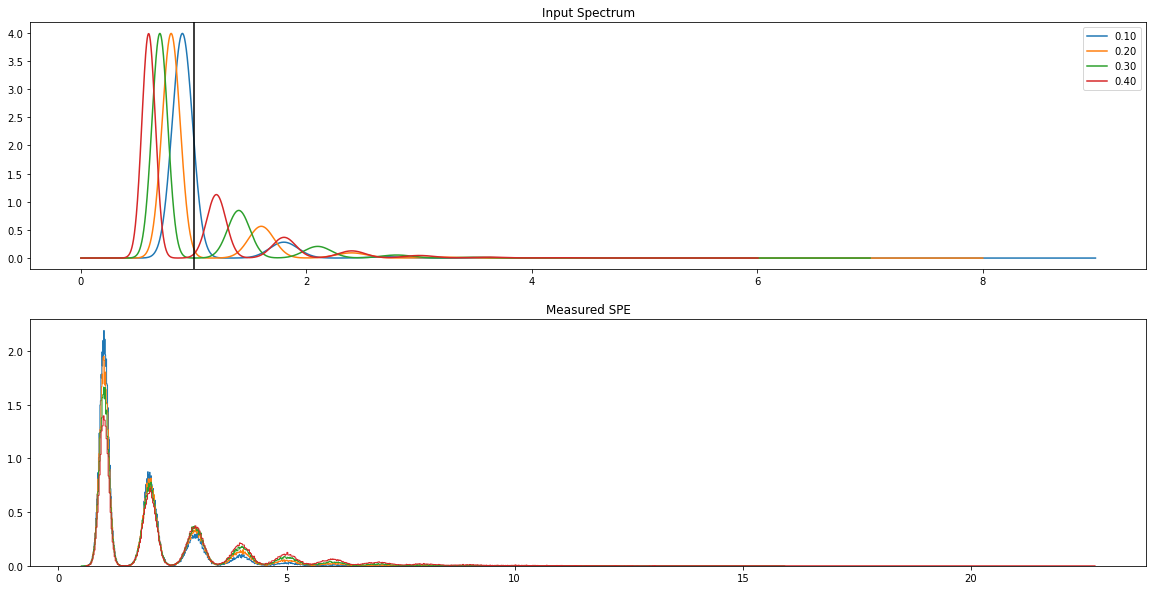

In [3]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)


for opct in np.arange(0.1, 0.5, 0.1):
    color = ax1._get_lines.get_next_color()
    camera = Camera(photoelectron_spectrum=SiPMGentileSPE(opct=opct, spe_sigma=0.1))
    ses_x = camera.photoelectron_spectrum.x
    ses_y = camera.photoelectron_spectrum.pdf
    f = ses_x[ses_y.argmax()]
    print(f"OPCT = {opct:.2f}, Measured OPCT correction factor = {f:.2f}")
    ax1.plot(ses_x, ses_y/np.trapz(ses_y, ses_x), label=f"{opct:.2f}", color=color)

    
    source = PhotoelectronSource(camera)
    n_events = 100
    n_pixels = 2048
    charge = np.zeros((n_events, n_pixels))
    for iev in range(n_events):
        pe = source.get_uniform_illumination(20, 1)
        charge[iev] = pe.get_charge_per_pixel(n_pixels)
    charge /= f
    charge = charge.ravel()
    charge = charge[np.nonzero(charge)]
    ax2.hist(charge, bins=1000, density=True, histtype='step', color=color)
    
    k = np.arange(1, 6)
    print("Hist Average Charge: ", np.mean(charge) * f)

ax1.axvline(1, color='black')
ax1.set_title("Input Spectrum")
ax1.legend()

ax2.set_title("Measured SPE")